In [1]:
from npl.core import Nanoparticle
from npl.descriptors.local_environment_feature_classifier import LocalEnvironmentFeatureClassifier
from npl.calculators import BayesianRRCalculator
from npl.descriptors.global_feature_classifier import testTopologicalFeatureClassifier
from npl.utils.utils import plot_cummulative_success_rate
from ase.visualize import view
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt

In [2]:
"""Create one randomly ordered start particle"""

def create_start_particle(height, trunc, stoichiometry):
    start_particle = Nanoparticle()
    start_particle.truncated_octahedron(height, trunc, stoichiometry)
    return start_particle

In [3]:
from npl.calculators.energy_calculator import compute_coefficients_for_linear_topological_model
from npl.calculators import BayesianRRCalculator

global_energy_calculator = BayesianRRCalculator.load('bayesian_rr_calculator.pkl')
global_topological_coefficients = global_energy_calculator.get_coefficients()
print(global_topological_coefficients)
symbols = ['Au', 'Pt']
n_atoms = 79
coefficients, total_energies = compute_coefficients_for_linear_topological_model(
    global_topological_coefficients,
    symbols, n_atoms)

energy_calculator = BayesianRRCalculator('TEC')
energy_calculator.set_coefficients(coefficients)

[0.02123817 0.02598563 0.0460402  0.19972073 0.         0.
 0.         0.         0.         0.         0.22505903 0.54387933
 0.15638484 0.49312446 0.         0.         0.57875965]
Coef symbol_a: Au


In [4]:
from npl.descriptors.local_environment_feature_classifier import TopologicalEnvironmentClassifier
from npl.descriptors.local_environment_calculator import NeighborCountingEnvironmentCalculator


local_feature_classifier = TopologicalEnvironmentClassifier(
    NeighborCountingEnvironmentCalculator(symbols), 
    symbols)

In [5]:
from npl.monte_carlo import mc_run

steps_MC, energies_MC = [], []
for i in range(5):
    start_particle = create_start_particle(6, 1, {'Au': 0.33, 'Pt': 0.67})
    beta, max_steps = 250, 1000
    [best_particle, accepted_energies] = mc_run(beta, max_steps, start_particle, energy_calculator, local_feature_classifier)
    
    min_energy, min_step = min(accepted_energies, key=lambda x: x[0])
    energies_MC.append(min_energy)
    steps_MC.append(min_step)
    if min_energy <= min(energies_MC):
        global_minimum = best_particle

npl.monte_carlo.monte_carlo - INFO - MonteCarlo initialized with beta: 250 and max_steps: 1000
npl.monte_carlo.monte_carlo - INFO - Step: 2000
npl.monte_carlo.monte_carlo - INFO - Lowest energy: 17.942227791786447
npl.monte_carlo.monte_carlo - INFO - MonteCarlo initialized with beta: 250 and max_steps: 1000
npl.monte_carlo.monte_carlo - INFO - Step: 2000
npl.monte_carlo.monte_carlo - INFO - Lowest energy: 17.939956571771194
npl.monte_carlo.monte_carlo - INFO - MonteCarlo initialized with beta: 250 and max_steps: 1000
npl.monte_carlo.monte_carlo - INFO - Step: 2000
npl.monte_carlo.monte_carlo - INFO - Lowest energy: 17.93938876676738
npl.monte_carlo.monte_carlo - INFO - MonteCarlo initialized with beta: 250 and max_steps: 1000
npl.monte_carlo.monte_carlo - INFO - Step: 2000
npl.monte_carlo.monte_carlo - INFO - Lowest energy: 17.942227791786447
npl.monte_carlo.monte_carlo - INFO - MonteCarlo initialized with beta: 250 and max_steps: 1000
npl.monte_carlo.monte_carlo - INFO - Step: 2000
np

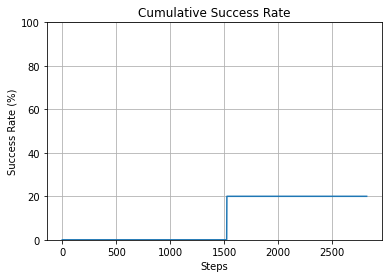

In [6]:
plot_cummulative_success_rate(energies_MC, steps_MC)

(0.0, 19.236, 0.0, 19.236)

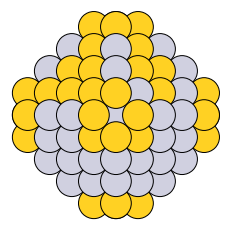

In [7]:
plot_atoms(global_minimum.get_ase_atoms(), rotation=('0x,+180y,0z'))
plt.axis('off')

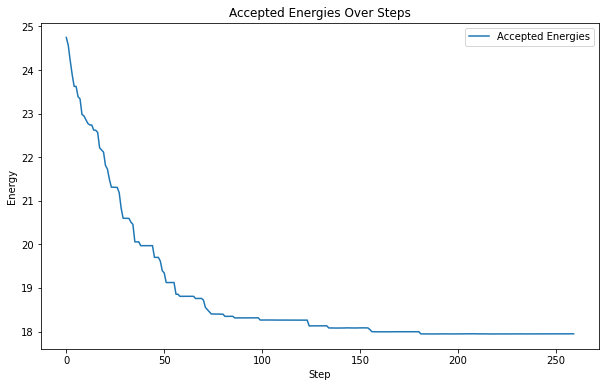

In [8]:
import matplotlib.pyplot as plt

# Extract energies from the accepted_energies list
energies = [energy for energy, _ in accepted_energies]

# Plot the energies
plt.figure(figsize=(10, 6))
plt.plot(energies, label='Accepted Energies')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Accepted Energies Over Steps')
plt.legend()
plt.show()

In [9]:
from npl.optimization.basin_hopping import run_basin_hopping

steps_BH, energies_BH = [], []
for i in range(20):
    start_particle = create_start_particle(4, 1, {'Au': 0.33, 'Pt': 0.67})
    [best_particle, lowest_energies, flip_energy_list] = run_basin_hopping(start_particle,
                                                                        energy_calculator, 
                                                                        total_energies, 
                                                                        100, 
                                                                        5,
                                                                        local_feature_classifier=None)
    energies_BH.append(lowest_energies[-2][0])
    steps_BH.append(lowest_energies[-2][1])
    if min_energy <= min(energies_BH):
        global_minimum = best_particle

root - INFO - Starting Basin Hopping simulation
root - INFO - Hopping attempts: 100
root - INFO - Hops: 5
root - INFO - Starting energy: 4.491587902070887
root - INFO - Energy after local_opt: 3.245, lowest 3.245
root - INFO - Lowest energy: 3.243
root - INFO - Starting Basin Hopping simulation
root - INFO - Hopping attempts: 100
root - INFO - Hops: 5
root - INFO - Starting energy: 5.201467602466621
root - INFO - Energy after local_opt: 3.243, lowest 3.243
root - INFO - Lowest energy: 3.243
root - INFO - Starting Basin Hopping simulation
root - INFO - Hopping attempts: 100
root - INFO - Hops: 5
root - INFO - Starting energy: 4.491587902070888
root - INFO - Energy after local_opt: 3.244, lowest 3.244
root - INFO - Lowest energy: 3.243
root - INFO - Starting Basin Hopping simulation
root - INFO - Hopping attempts: 100
root - INFO - Hops: 5
root - INFO - Starting energy: 4.406326751198136
root - INFO - Energy after local_opt: 3.243, lowest 3.243
root - INFO - Lowest energy: 3.243
root - I

(0.0, 19.236, 0.0, 19.236)

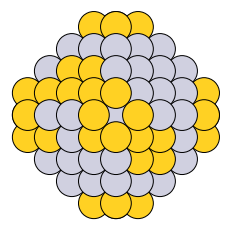

In [10]:
plot_atoms(global_minimum.get_ase_atoms(), rotation=('0x,0y,0z'))
plt.axis('off')

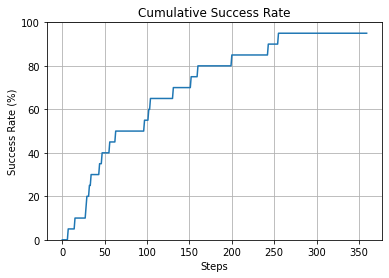

In [11]:
plot_cummulative_success_rate(energies_BH, steps_BH)